Presented by: Reza Saadatyar 2022-2023<br/>
E-mail: Reza.Saadatyar92@gmail.com<br/>
[Link](https://github.com/RezaSaadatyar/Deep-Learning-in-python)

**Recurrent Neurons and Layers**

![Alt text](1.jpg)
![Alt text](2.jpg)

================================== Importing the required Libraries ===========================

In [21]:
import os
import sys
import math 
import numpy as np
import pandas as pd
import yfinance as yf          # pip install yfinance
import tensorflow as tf
import statsmodels.api as sm
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

========================================= Functions ==================================

In [25]:
# =============================================== Preparing data =====================================================
def Prepare_data(data):  
     # -------------------------------------------- Step 1.1: Check type data ----------------------------------------     
    if 'DataFrame' not in str(type(data)):      
        data = pd.DataFrame(data)
    # ---------------------------------------- Step 1.2: Check dimensional data --------------------------------------
    if data.ndim < 3:
        if data.shape[0] < data.shape[1]:
            data = data.T
    elif data.ndim > 3:
        print("Please configure the data as two-dimensional (Sample * Channels)")
        sys.exit()
        
    return data

# ============================================= Sequences data =======================================================
def sequences_data(data, x_steps=6, y_steps=3, train_size=0.7, nfeatures=1):
    # !============================================= Step 1: Split data ==============================================
    # -------------------------------------------- Step 1.1: Check type data -----------------------------------------    
    if 'DataFrame' not in str(type(data)):      
        data = pd.DataFrame(data)
    # ---------------------------------------- Step 1.2: Check dimensional data --------------------------------------
    if data.ndim < 3:
        if data.shape[0] < data.shape[1]:
            data = data.T
    elif data.ndim > 3:
        print("Please configure the data as two-dimensional (Sample * Channels)")
        sys.exit()
    # ----------------------------------------------- Step 1.3: split ------------------------------------------------   
    n = math.floor(data.shape[0] * train_size)
    data_train = data.iloc[0:n,:].values.reshape(-1,1)
    data_test = data.iloc[data_train.shape[0]-x_steps:,:].values.reshape(-1,1)
    # ?============================================== Step 2: Normalize ==============================================
    mod = MinMaxScaler(feature_range=(0, 1))
    # data_train = mod.fit_transform(data_train)
    # data_test = mod.transform(data_test.reshape(-1,1))
    # !============================================== Step 3: Sequences ==============================================
    # --------------------------------------------- Step 3.1: Sequences x_train --------------------------------------
    x_train = []
    y_train = []
    for i in range(x_steps, len(data_train)-y_steps+1):
        x_train.append(data_train[i-x_steps:i, 0])
        y_train.append(data_train[i:i+y_steps, 0])
    x_train = np.array(x_train)
    y_train = np.array(y_train)
    x_train = x_train.reshape((x_train.shape[0], x_train.shape[1], nfeatures))
    # -------------------------------------------- Step 3.2: Sequences x_test ----------------------------------------
    x_test = []
    y_test = []
    for i in range(x_steps, len(data.iloc[n:,:])+x_steps-y_steps+1):
        x_test.append(data_test[i-x_steps:i, 0])
        y_test.append(data_test[i:i+y_steps, 0])

    x_test = np.array(x_test)
    x_test = x_test.reshape((x_test.shape[0], x_test.shape[1], 1))
    y_test = np.array(y_test)
    
    return x_train, y_train, x_test, y_test, mod

*Step 1.1: Load Data*

In [6]:
data = sm.datasets.sunspots.load_pandas()  
data = data.data["SUNACTIVITY"]

In [9]:
data = Prepare_data(data)
print(f"{data = }")

data =      SUNACTIVITY
0            5.0
1           11.0
2           16.0
3           23.0
4           36.0
..           ...
304         40.4
305         29.8
306         15.2
307          7.5
308          2.9

[309 rows x 1 columns]
 


*Step 1.2: Plot data*

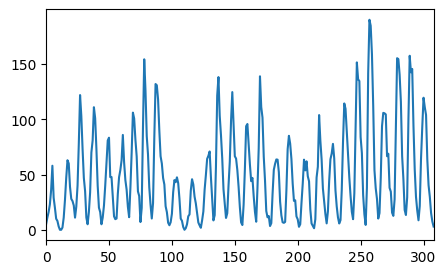

In [10]:
_, axs = plt.subplots(nrows=1,sharey='row', figsize=(5,3))
axs.plot(data)
axs.set_xlabel('', fontsize=10)
axs.set_title(f"", fontsize=10)
axs.set_ylabel('', fontsize=10)
axs.autoscale(enable=True, axis="x",tight=True)

*Step 2: Sequences*

In [122]:
x_train, y_train, x_test, y_test, mod = sequences_data(data, x_steps=6, y_steps=3, train_size=0.7, nfeatures=1)

In [130]:
data.shape

(309, 1)

In [132]:
208+91-309

-10

**Recurrent Neural Networks (RNN)**<br/>
*inputs $\Rightarrow$ A 3D tensor, with shape [batch, timesteps, feature].*<br/>
[Link](https://www.tensorflow.org/api_docs/python/tf/keras/layers/SimpleRNN)